<a href="https://colab.research.google.com/github/L-ansari/Natural-Language-Processing-tasks/blob/master/EDA_dep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import sklearn

from sklearn.preprocessing import StandardScaler   

!pip install senticnet


     |████████████████████████████████| 51.9 MB 32 kB/s 


In [2]:
from senticnet.senticnet import SenticNet
import nltk
from nltk import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [4]:
""" Helper functions """


def encode_data(dataframe, column_name, encodedict):
  """column_name:  is a list of column head names
  encodedict:  is a dictionary encoding of labels"""
  
  dataframe.columns = column_name
  dataframe['label'] = dataframe['label'].map(encodedict) 

  return dataframe #  encode labels

def plot(dataframe,dataset ):
  #print("Reddit Dataset\n")
  print(f'Dataset: {dataset}',"\n")
  return sns.countplot(x = 'label', data=dataframe)

def split(X,y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=None, shuffle=False)
  return X_train, X_test, y_train, y_test 

def normalize (scaler, X_train, X_test):
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)
  return X_train, X_test

# note that y_pred has shape (N_samples,N_labels) while y_real has shape (N_samples,1)
# weights means weighting according to class frequencies
def loss_logloss(y_pred, y_real, weighted=False):
    weights = None
    if weighted:
        class_to_frequency = class_weights(y_real)
        weights = np.array([1/class_to_frequency[y-1] for y in y_real])
    loss = sklearn.metrics.log_loss(y_real, y_pred, sample_weight=weights, labels=[0,1])
    return loss
# array which tells for every class how many times it occurs in the training labels
# note that class labels start from 1 while class indices start from 0!
def class_weights(y):
    unique, counts = np.unique(y, return_counts=True)
    n_classes = 10
    class_weights = np.zeros(n_classes)
    for classNumber, count in zip(unique, counts):
            class_weights[classNumber-1] = count
    return class_weights


def get_feature(message):
  """This function gives out a dataframe of extracted features"""
  sn = SenticNet()

  polarity_value=0
  polarity_label=0
  introspection=0
  sensitivity=0
  temper=0
  attitude=0

  for word in (message):
    try:
      concept = sn.concept(word)
      pol_value = float(concept['polarity_value'])
      pol_label=concept['polarity_label']
      intros=float(concept['sentics']['introspection'])
      sensit=float(concept['sentics']['sensitivity'])
      temp=float(concept['sentics']['temper'])
      attit=float(concept['sentics']['attitude'])

      if  concept['polarity_label']=='positive':
        pol_label =1
      else:
        pol_label=0

      polarity_value += pol_value
      polarity_label +=pol_label
      introspection +=intros
      sensitivity +=sensit
      temper +=temp
      attitude +=attit

    except KeyError:
        pass
   
  return polarity_value , polarity_label, introspection, sensitivity, temper, attitude

def get_scentic_features(df): #dataframe

  df['polarity_value'] = 0
  df['polarity_label'] = 0
  df['sensitivity'] = 0
  df['introspection'] = 0
  df['temper'] = 0
  df['attitude'] = 0
  for i in range(df.shape[0]):
    polarity_value , polarity_label, introspection, sensitivity, temper, attitude=get_feature (word_tokenize(df['text'][i].lower()))
    df['polarity_value'][i] = polarity_value
    df['polarity_label'][i] = polarity_label
    df['sensitivity'][i] = sensitivity
    df['introspection'][i]= introspection
    df['temper'][i] = temper
    df['attitude'][i]= attitude

  return df  

def clean(test_str):
  # initializing punctuations string  
  punc = '''!()-[]{};:`“”'"\|,+=<>./?@#$%^&*_~'''
  
# Removing punctuations in string 
# Using loop + punctuation string 
  for ele in test_str:  
    if ele in punc:  
        test_str = test_str.replace(ele, " ")  

  return test_str



In [5]:
#example of cleaning text
a="this']'=,“i`|-+s? 100%notw“orking 'I am .tired!` )([])]I*/+:;-like_fruit...and milk'"

In [6]:
#we apply clean function
b=clean(a)
print(b)

this      i    s  100 notw orking  I am  tired         I      like fruit   and milk 


In [7]:
df_train= pd.read_csv(Path('/content/drive/My Drive/DSP/data/bachelor/CLPsych_train_binary.csv'))


In [8]:
df_train.head(3)

,label,text
0,depression_ctrl,Game over RT : Life is so unpredictable. Be gr...
1,depression,Happy ! Guys: please check your balls monthly ...
2,depression_ctrl,Photo: lkfrannyfrano: hotshxxt: migzfromatx: s...


In [9]:
df_train.shape[0]

654

In [10]:
df_train=get_scentic_features(df_train)
encodedict={'depression': 1, 'depression_ctrl': 0}
df_train['label'] = df_train['label'].map(encodedict) 
df_train.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:98: SettingWithCopyWarning: 
A value is trying to b

,label,text,polarity_value,polarity_label,sensitivity,introspection,temper,attitude
0,0,Game over RT : Life is so unpredictable. Be gr...,1280,3481,831,1040,38,209
1,1,Happy ! Guys: please check your balls monthly ...,2149,6548,1431,1670,44,639
2,0,Photo: lkfrannyfrano: hotshxxt: migzfromatx: s...,1795,3707,808,1607,-6,272


In [11]:
 #df_train=  df_train.sample(frac=1).reset_index(drop=True) #shuffle train set

In [12]:
#we find length of each text
lengths=[]
word_counts=[]
for i in range(df_train.shape[0]):
  word_counts.append(len(clean(df_train.iloc[i][1]).split()))
  lengths.append(len(df_train.iloc[i][1]))


In [13]:
X_train = df_train.iloc[:, 2:]
y_train = df_train.iloc[:, 0]

In [14]:
X_train = StandardScaler().fit_transform(X_train)


In [15]:
df = pd.DataFrame(X_train, columns = ['polarity_value','polarity_label','sensitiviy', 'introspection', 'temper', 'attitude'])
df['label']=df_train['label']
df.head(3)


,polarity_value,polarity_label,sensitiviy,introspection,temper,attitude,label
0,0.635321,0.525104,0.752861,0.466465,0.624734,0.374580,0
1,1.987984,2.527720,2.150160,1.578699,0.668231,3.082949,1
2,1.436957,0.672672,0.699298,1.467475,0.305755,0.771387,0


#A.Univariate analysis

#1. Class distribution

Dataset: Clpsych 



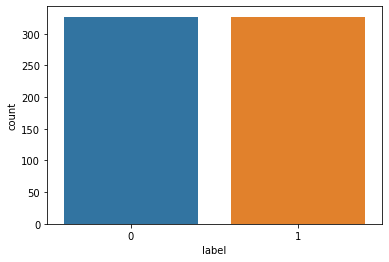

In [17]:
#columns = ['label', 'text', 'afinn_positive', 'afinn_negative', 'nrc_positive', 'nrc_negative', 'nrc_anger', 'nrc_anticipation', 'nrc_disgust', 'nrc_fear', 'nrc_joy', 'nrc_sadness', 'nrc_surprise', 'nrc_trust', 'mpqa_positive', 'mpqa_negative', 'mpqa_strong_subjectivty']
#df_mixed=encode_data(df_mixed, columns, encodedict={'positive': 1, 'negative': 0})
import seaborn as sns

plot(df, "Clpsych") 


#2.Table of Feature Statistics

In [18]:
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ['Senticnet Attributes', 'Measures']
table.add_row(['Max of polarity_value', df['polarity_value'].max()])
table.add_row(['Min of polarity_value', df['polarity_value'].min()])
table.add_row(['Mean of polarity_value', df['polarity_value'].mean()])
table.add_row([' ', ' '])
table.add_row(['Max of attitude', df['attitude'].max()])
table.add_row(['Min of attitude', df['attitude'].min()])
table.add_row(['Mean of attitude', df['attitude'].mean()])
table.add_row([' ', ' '])
table.add_row(['Max of attitude', df['temper'].max()])
table.add_row(['Min of attitude', df['temper'].min()])
table.add_row(['Mean of attitude', df['temper'].mean()])
table.add_row([' ', ' '])
table.add_row(['Max of attitude', df['introspection'].max()])
table.add_row(['Min of attitude', df['introspection'].min()])
table.add_row(['Mean of attitude', df['introspection'].mean()])



print(table)

+------------------------+-------------------------+
|  Senticnet Attributes  |         Measures        |
+------------------------+-------------------------+
| Max of polarity_value  |    5.378205126182084    |
| Min of polarity_value  |   -1.6544013681729715   |
| Mean of polarity_value |   7.69007691368801e-17  |
|                        |                         |
|    Max of attitude     |    8.140670874757872    |
|    Min of attitude     |   -2.7054028941670922   |
|    Mean of attitude    |  -5.007886731871883e-17 |
|                        |                         |
|    Max of attitude     |    8.642711451137444    |
|    Min of attitude     |   -3.9279690987810523   |
|    Mean of attitude    | -1.0694808952811142e-17 |
|                        |                         |
|    Max of attitude     |    4.542889558362929    |
|    Min of attitude     |   -1.8321513527465902   |
|    Mean of attitude    | -2.0371064672021222e-18 |
+------------------------+--------------------

#3. Text length: word counts and string length

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


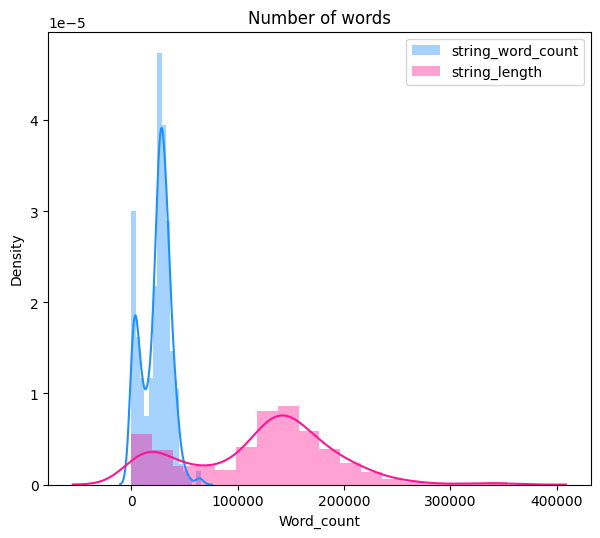

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(7,6), dpi=100)
sns.distplot( word_counts , color="dodgerblue", label="string_word_count")
#sns.distplot( df.loc[df.species=='virginica', "sepal_length"] , color="orange", label="virginica")
#sns.distplot( df.loc[df.species=='versicolor', "sepal_length"] , color="deeppink", label="versicolor")
sns.distplot( lengths , color="deeppink",  label="string_length")

#plt.title('Number of words')
plt.gca().set(title='Number of words', xlabel='Word_count')

plt.legend();
plt.show();      
        

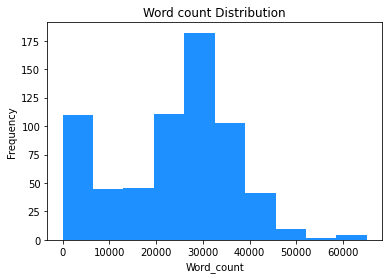

In [20]:
import matplotlib.pyplot as plt
plt.hist(word_counts, color="dodgerblue")
#plt.title('Word count in sentences')
plt.gca().set(title='Word count Distribution', xlabel='Word_count', ylabel='Frequency')

plt.show()

#4.Single Feautre Distribution

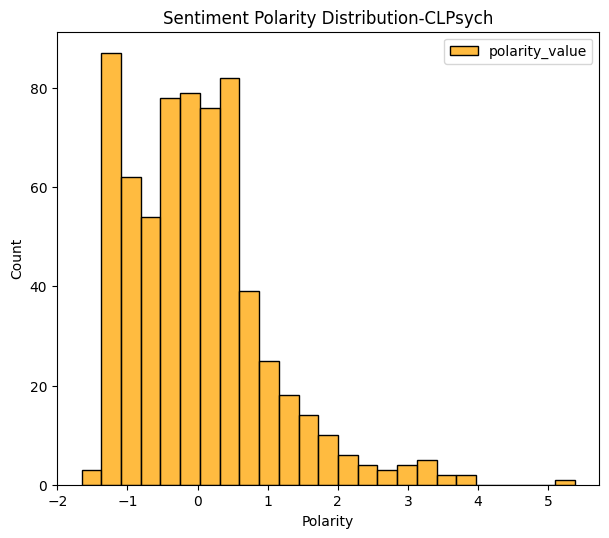

In [21]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(7,6), dpi=100)
sns.histplot( df['polarity_value'] , color="orange", label="polarity_value")

plt.gca().set(title='Sentiment Polarity Distribution-CLPsych', xlabel='Polarity')

#plt.title('Length of strings', xlabel='length')
plt.legend();
plt.show();      
        

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


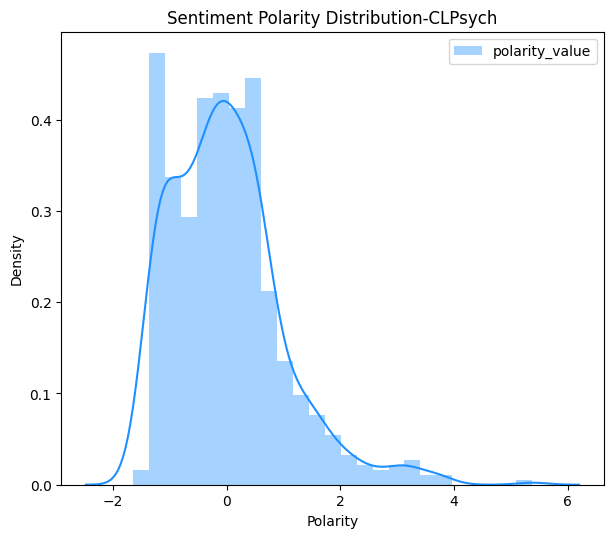

In [22]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(7,6), dpi=100)
sns.distplot( df['polarity_value'] , color="dodgerblue", label="polarity_value")

plt.gca().set(title='Sentiment Polarity Distribution-CLPsych', xlabel='Polarity')

#plt.title('Length of strings', xlabel='length')
plt.legend();
plt.show();      
        

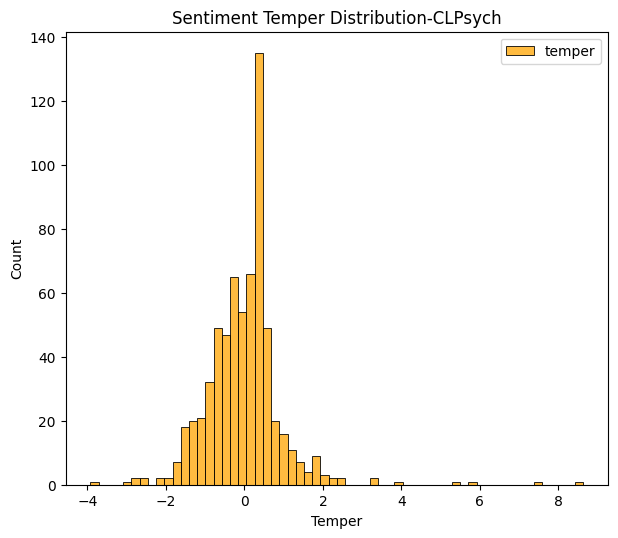

In [23]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(7,6), dpi=100)
sns.histplot( df['temper'] , color="orange", label="temper")

plt.gca().set(title='Sentiment Temper Distribution-CLPsych', xlabel='Temper')

#plt.title('Length of strings', xlabel='length')
plt.legend();
plt.show();      
        

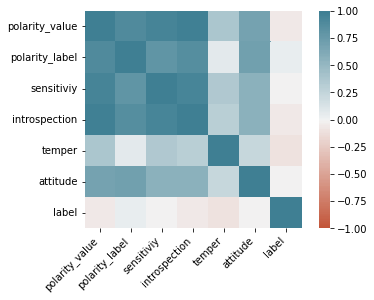

In [24]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

#Reddit - Same analysis 

In [25]:
reddit= pd.read_csv(Path('/content/drive/My Drive/DSP/data/bachelor/Reddit_shuffled.csv'))
reddit.drop(reddit.columns[0], axis=1, inplace=True)
reddit.head(2)


,label,text,afinn_positive,afinn_negative,nrc_positive,nrc_negative,nrc_anger,nrc_anticipation,nrc_disgust,nrc_fear,nrc_joy,nrc_sadness,nrc_surprise,nrc_trust,mpqa_positive,mpqa_negative,mpqa_strong_subjectivty
0,1,How to avoid a relapse?\nI've been having a pa...,9.0,12.0,5.0,6.0,2.0,1.0,1.0,4.0,1.0,3.0,0.0,3.0,10.0,9.0,11.0
1,1,This is how I feel and I have a slight sense I...,40.0,63.0,24.0,21.0,13.0,8.0,9.0,11.0,9.0,12.0,3.0,14.0,35.0,28.0,43.0


In [26]:
reddit=reddit.iloc[:,:2]
reddit_scentic=get_scentic_features(reddit)
#encodedict={'positive': 1, 'negative': 0}
#reddit_scentic['label'] = reddit_scentic['label'].map(encodedict) 
reddit_scentic.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:98: SettingWithCopyWarning: 
A value is trying to b

,label,text,polarity_value,polarity_label,sensitivity,introspection,temper,attitude
0,1,How to avoid a relapse?\nI've been having a pa...,2,12,0,2,-1,2
1,1,This is how I feel and I have a slight sense I...,13,48,7,7,-2,13


In [27]:
X_reddit = reddit_scentic.iloc[:, 2:]
y_reddit = reddit_scentic.iloc[:, 0]
X_train_reddit = StandardScaler().fit_transform(X_reddit)


In [28]:
df_reddit = pd.DataFrame(X_train_reddit, columns = ['polarity_value','polarity_label','sensitiviy', 'introspection', 'temper', 'attitude'])
df_reddit['label']=reddit_scentic['label']
df_reddit.head(3)


,polarity_value,polarity_label,sensitiviy,introspection,temper,attitude,label
0,-0.215576,-0.315477,-0.428168,-0.086510,0.017912,0.133514,1
1,1.057947,1.159241,0.585761,0.546497,-0.302242,2.706094,1
2,1.057947,0.176096,1.454844,1.559307,0.017912,-0.334228,1


In [29]:
from sklearn.feature_extraction.text import CountVectorizer


#5.The distribution of top unigrams before removing stop words


In [30]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df_train['text'], 20)
for word, freq in common_words:
    print(word, freq)


rt 383189
the 356240
to 344099
you 342687
and 215834
my 210357
it 190743
is 170354
me 161746
in 151509
of 146129
for 133829
that 131634
so 114588
on 107631
this 103549
be 94052
just 90635
like 87014
with 85939


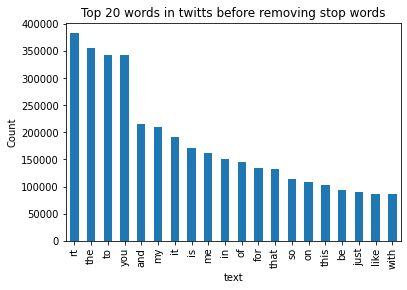

In [31]:
df1 = pd.DataFrame(common_words, columns = ['text' , 'count'])
#df1.drop([0],axis=0,inplace=True)
df1.groupby('text').sum()['count'].sort_values(ascending=False).plot(  ylabel='Count',
    kind='bar', title='Top 20 words in twitts before removing stop words')

#6.The distribution of top unigrams after removing stop words


In [32]:

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df_train['text'], 20)
for word, freq in common_words:
    print(word, freq)


rt 383189
just 90635
like 87014
love 64320
don 61422
know 43965
lol 43317
amp 42032
people 40453
want 38169
gt 38127
good 36778
day 34880
time 33517
really 30590
got 29327
today 29211
need 28460
im 28154
think 27868


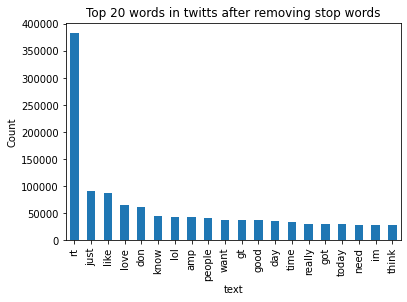

In [33]:
df2 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df2.groupby('text').sum()['count'].sort_values(ascending=False).plot(ylabel='Count',
    kind='bar',  title='Top 20 words in twitts after removing stop words')


#7.The distribution of top bigrams before removing stop words


In [34]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df_train['text'], 20)
for word, freq in common_words:
    print(word, freq)

in the 31347
you re 26761
if you 26674
to be 24485
gt gt 23734
of the 19069
want to 16987
love you 16708
on the 16235
going to 16146
so much 15583
for the 14789
to the 14742
rt rt 13916
this is 13760
to get 12019
in my 11998
need to 11893
rt if 11682
have to 11631


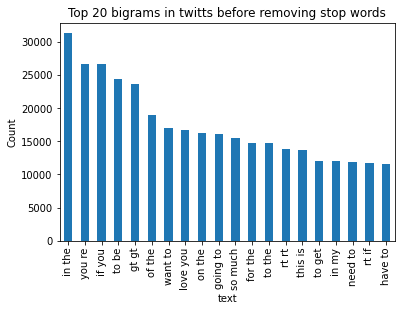

In [35]:
df3 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df3.groupby('text').sum()['count'].sort_values(ascending=False).plot(ylabel='Count',
    kind='bar',  title='Top 20 bigrams in twitts before removing stop words')

#8.The distribution of top bigrams after removing stop words


In [36]:

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df_train['text'], 20)
for word, freq in common_words:
    print(word, freq)


gt gt 23744
rt rt 16019
lt lt 9817
don know 6943
feel like 6643
rt don 6619
rt just 6581
rt love 5471
happy birthday 5084
lol rt 4913
love rt 4055
just want 3750
don want 3736
rt want 3415
rt people 3203
don like 3101
like rt 2962
lt rt 2904
gt rt 2879
today stats 2879


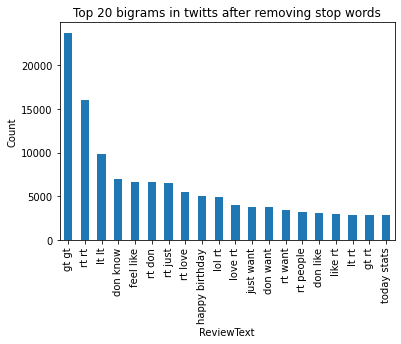

In [37]:
df4 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df4.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(ylabel='Count',
    kind='bar',  title='Top 20 bigrams in twitts after removing stop words')

#9.The distribution of Top trigrams before removing stop words


In [38]:

def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df_train['text'], 20)
for word, freq in common_words:
    print(word, freq)


gt gt gt 15890
lt lt lt 6373
rt if you 5841
you so much 4844
please follow me 3237
if you re 3070
to go to 2942
love you so 2931
going to be 2843
can wait to 2286
rt rt if 2279
one of the 2231
rt this is 2113
want to be 2106
don want to 2065
oh my god 1986
just want to 1965
you want to 1930
of my life 1902
in love with 1894


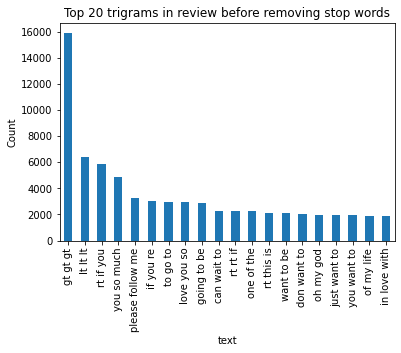

In [39]:
df5 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df5.groupby('text').sum()['count'].sort_values(ascending=False).plot(ylabel='Count',
    kind='bar',  title='Top 20 trigrams in review before removing stop words')

#10.The distribution of Top trigrams after removing stop words


In [40]:

def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df_train['text'], 20)
for word, freq in common_words:
    print(word, freq)


gt gt gt 15894
lt lt lt 6375
rt rt rt 2066
gt gt rt 1815
stats new followers 1488
today stats new 1414
rt happy birthday 1215
new followers new 995
today stats followers 906
followers new unfollowers 807
season perfect season 796
perfect season fallow 796
photo photo photo 783
stats followers unfollowers 763
season fallow season 761
fallow season perfect 761
rt cross line 746
followers unfollowers followed 733
unfollowers followed people 703
rt just want 693


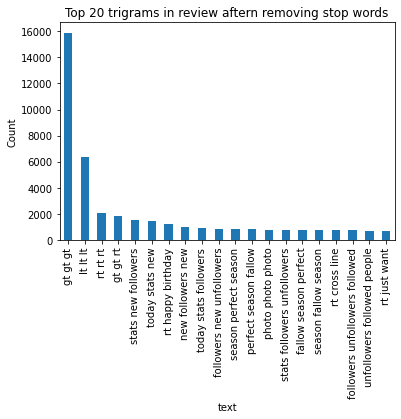

In [41]:
df6 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df6.groupby('text').sum()['count'].sort_values(ascending=False).plot(ylabel='Count',
    kind='bar',  title='Top 20 trigrams in review aftern removing stop words')

In [42]:
from textblob import TextBlob
import nltk
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

#11.The distribution of top part-of-speech tags of twitts corpus


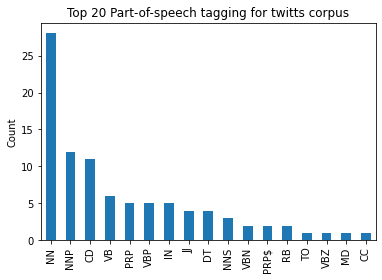

In [43]:

blob = TextBlob(str(df_train['text']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.plot(ylabel='Count',
    kind='bar',  title='Top 20 Part-of-speech tagging for twitts corpus')


#12.Distribution of sentiment polarity score by class 


In [44]:
x1 = df.loc[df_train['label'] == 1, 'polarity_value']
x0 = df.loc[df_train['label'] == 0, 'polarity_value']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


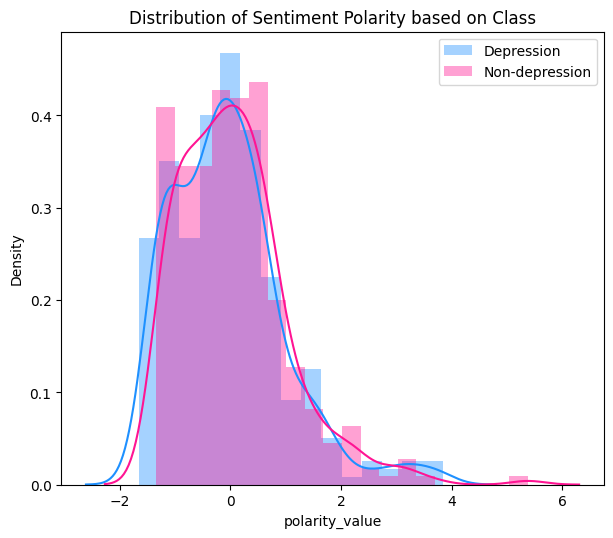

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(7,6), dpi=100)
sns.distplot( x1 , color="dodgerblue", label="Depression")
#sns.distplot( df.loc[df.species=='virginica', "sepal_length"] , color="orange", label="virginica")
#sns.distplot( df.loc[df.species=='versicolor', "sepal_length"] , color="deeppink", label="versicolor")
sns.distplot( x0, color="deeppink",  label="Non-depression")

#plt.title('Number of words')
plt.gca().set(title='Distribution of Sentiment Polarity based on Class')

plt.legend();
plt.show();      
        

In [46]:
x1 = df.loc[df_train['label'] == 1, 'attitude']
x0 = df.loc[df_train['label'] == 0, 'attitude']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


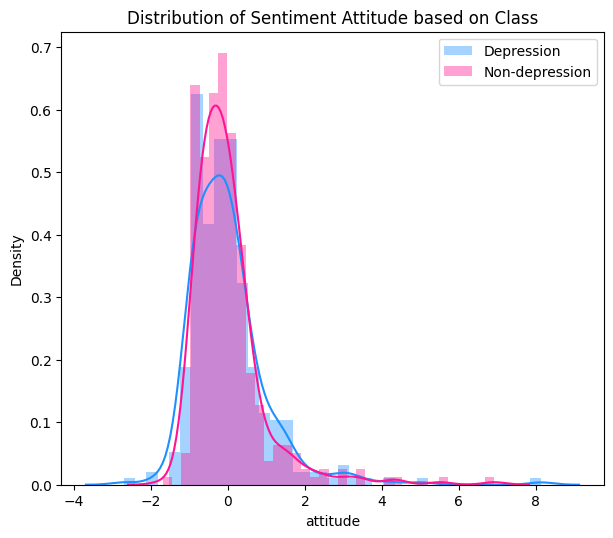

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(7,6), dpi=100)
sns.distplot( x1 , color="dodgerblue", label="Depression")
#sns.distplot( df.loc[df.species=='virginica', "sepal_length"] , color="orange", label="virginica")
#sns.distplot( df.loc[df.species=='versicolor', "sepal_length"] , color="deeppink", label="versicolor")
sns.distplot( x0, color="deeppink",  label="Non-depression")

#plt.title('Number of words')
plt.gca().set(title='Distribution of Sentiment Attitude based on Class')

plt.legend();
plt.show();      
        

In [48]:
x1 = df.loc[df_train['label'] == 1, 'temper']
x0 = df.loc[df_train['label'] == 0, 'temper']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


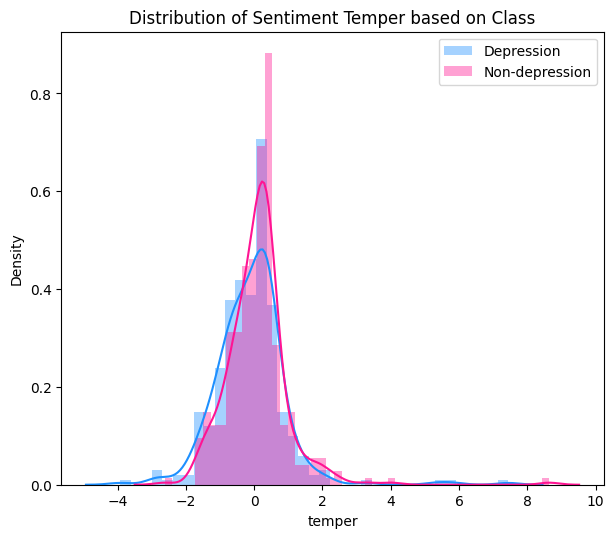

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(7,6), dpi=100)
sns.distplot( x1 , color="dodgerblue", label="Depression")
#sns.distplot( df.loc[df.species=='virginica', "sepal_length"] , color="orange", label="virginica")
#sns.distplot( df.loc[df.species=='versicolor', "sepal_length"] , color="deeppink", label="versicolor")
sns.distplot( x0, color="deeppink",  label="Non-depression")

#plt.title('Number of words')
plt.gca().set(title='Distribution of Sentiment Temper based on Class')

plt.legend();
plt.show();      
        

In [50]:
x1 = df.loc[df_train['label'] == 1, 'introspection']
x0 = df.loc[df_train['label'] == 0, 'introspection']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


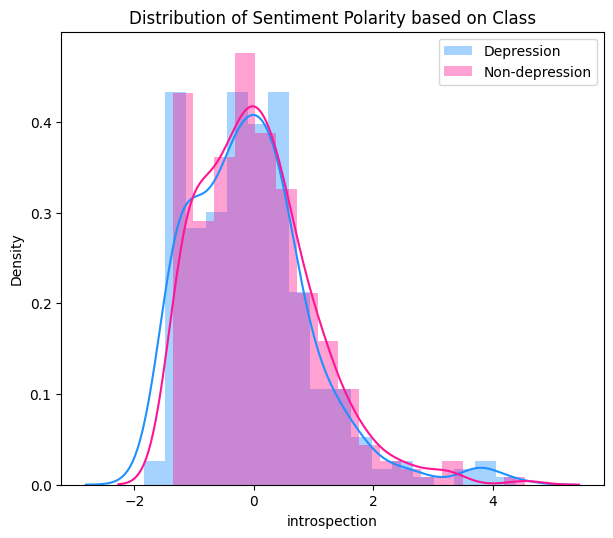

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(7,6), dpi=100)
sns.distplot( x1 , color="dodgerblue", label="Depression")
#sns.distplot( df.loc[df.species=='virginica', "sepal_length"] , color="orange", label="virginica")
#sns.distplot( df.loc[df.species=='versicolor', "sepal_length"] , color="deeppink", label="versicolor")
sns.distplot( x0, color="deeppink",  label="Non-depression")

#plt.title('Number of words')
plt.gca().set(title='Distribution of Sentiment Polarity based on Class')

plt.legend();
plt.show();      
        